In [26]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional,Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 500

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
model_rnn = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 83ms/step - accuracy: 0.6021 - loss: 0.6486 - val_accuracy: 0.7303 - val_loss: 0.5331
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7159 - loss: 0.5513 - val_accuracy: 0.7362 - val_loss: 0.5313
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7714 - loss: 0.4777 - val_accuracy: 0.6699 - val_loss: 0.6220
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7256 - loss: 0.5432 - val_accuracy: 0.5817 - val_loss: 0.6681
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7656 - loss: 0.4706 - val_accuracy: 0.7275 - val_loss: 0.5705


In [6]:
model_lstm = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.7313 - loss: 0.5121 - val_accuracy: 0.7049 - val_loss: 0.6175
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8417 - loss: 0.3627 - val_accuracy: 0.8498 - val_loss: 0.3523
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8270 - loss: 0.3845 - val_accuracy: 0.8568 - val_loss: 0.3619
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9192 - loss: 0.2100 - val_accuracy: 0.8498 - val_loss: 0.4091
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9356 - loss: 0.1706 - val_accuracy: 0.8332 - val_loss: 0.4263


In [7]:
model_bilstm = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Bidirectional(LSTM(128)),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.7201 - loss: 0.5269 - val_accuracy: 0.7866 - val_loss: 0.4713
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8519 - loss: 0.3486 - val_accuracy: 0.8608 - val_loss: 0.3394
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9244 - loss: 0.1972 - val_accuracy: 0.8407 - val_loss: 0.3983
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9499 - loss: 0.1382 - val_accuracy: 0.8761 - val_loss: 0.3498
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9604 - loss: 0.1067 - val_accuracy: 0.8530 - val_loss: 0.4629


In [8]:
model_deep_lstm = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_deep_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.7265 - loss: 0.5168 - val_accuracy: 0.8549 - val_loss: 0.3490
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8859 - loss: 0.2920 - val_accuracy: 0.8655 - val_loss: 0.3287
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9233 - loss: 0.1997 - val_accuracy: 0.8752 - val_loss: 0.3154
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9510 - loss: 0.1382 - val_accuracy: 0.8733 - val_loss: 0.3466
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9607 - loss: 0.1108 - val_accuracy: 0.8645 - val_loss: 0.3875


In [9]:
rnn_acc = model_rnn.evaluate(x_test, y_test)[1]
lstm_acc = model_lstm.evaluate(x_test, y_test)[1]
bilstm_acc = model_bilstm.evaluate(x_test, y_test)[1]
deep_lstm_acc = model_deep_lstm.evaluate(x_test, y_test)[1]

print(f"RNN Accuracy: {rnn_acc}")
print(f"LSTM Accuracy: {lstm_acc}")
print(f"BiLSTM Accuracy: {bilstm_acc}")
print(f"Deep LSTM Accuracy: {deep_lstm_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7244 - loss: 0.5783
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8289 - loss: 0.4387
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8521 - loss: 0.4748
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8627 - loss: 0.3957
RNN Accuracy: 0.7275199890136719
LSTM Accuracy: 0.8331599831581116
BiLSTM Accuracy: 0.8529999852180481
Deep LSTM Accuracy: 0.8644800186157227


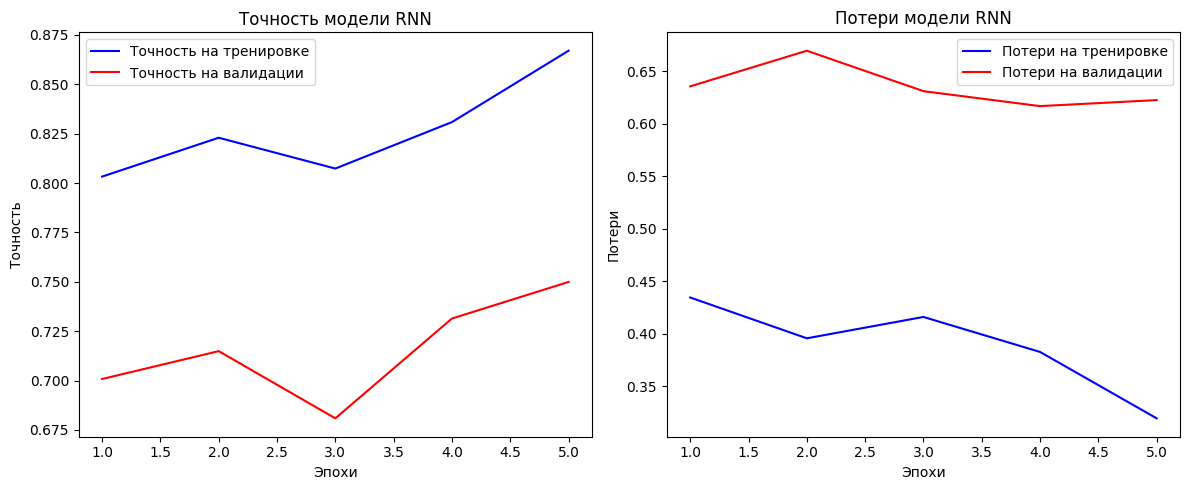

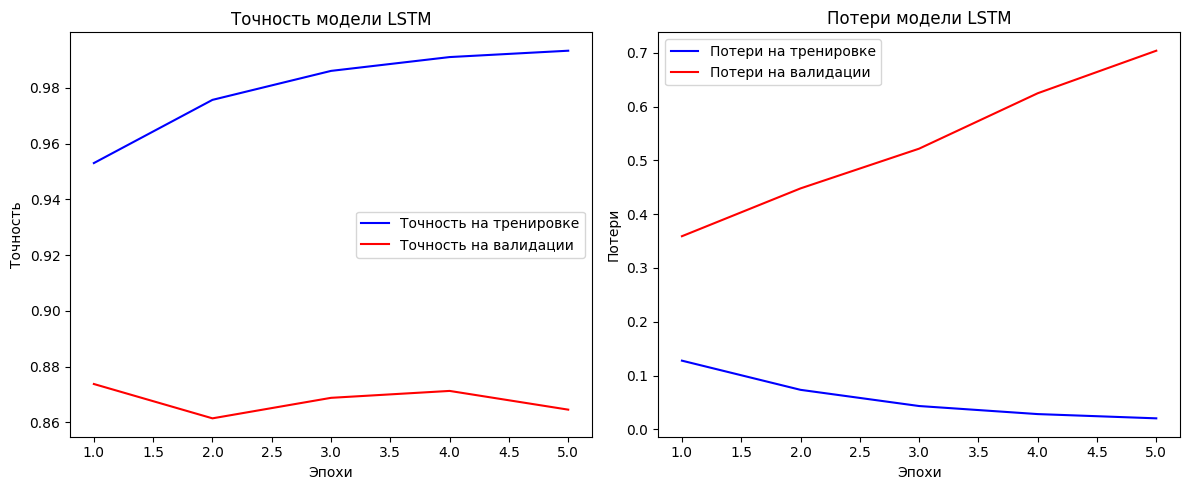

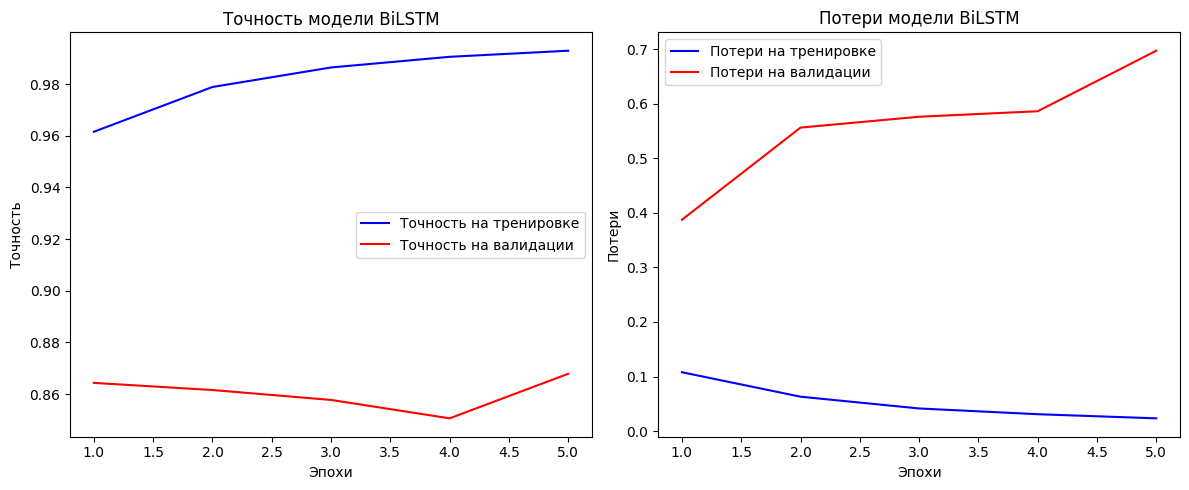

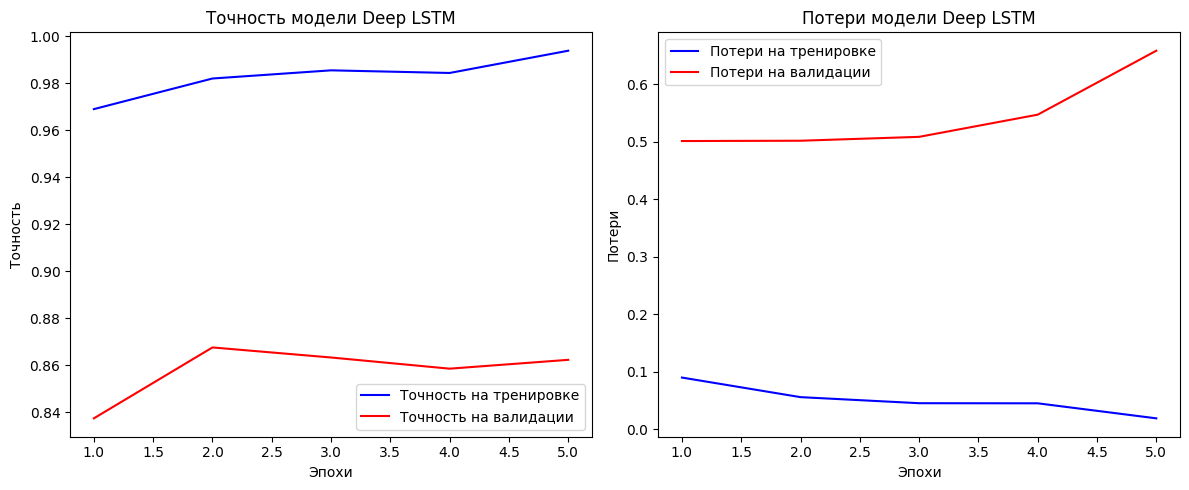

In [27]:
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Точность на тренировке')
    plt.plot(epochs, val_acc, 'r', label='Точность на валидации')
    plt.title(f'Точность модели {model_name}')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Потери на тренировке')
    plt.plot(epochs, val_loss, 'r', label='Потери на валидации')
    plt.title(f'Потери модели {model_name}')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history_rnn, "RNN")
plot_history(history_lstm, "LSTM")
plot_history(history_bilstm, "BiLSTM")
plot_history(history_deep_lstm, "Deep LSTM")

Везде есть проблема оверфита, я так понимаю для RNN она свойственна на тестовых данных, сделаем тоже самое но будет использовать регуляризацию.

In [17]:
model_rnn_reg = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SimpleRNN(128, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model_rnn_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn_reg = model_rnn_reg.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.5456 - loss: 0.7966 - val_accuracy: 0.7650 - val_loss: 0.5546
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7305 - loss: 0.5951 - val_accuracy: 0.6466 - val_loss: 0.6810
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.6329 - loss: 0.6654 - val_accuracy: 0.7914 - val_loss: 0.4836
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.8119 - loss: 0.4615 - val_accuracy: 0.8169 - val_loss: 0.4425
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.8521 - loss: 0.3792 - val_accuracy: 0.8196 - val_loss: 0.4288
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.8477 - loss: 0.3867 - val_accuracy: 0.7575 - val_loss: 0.5415
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7002 - loss: 0.5902 - val_accuracy: 0.8031 - val_loss: 0.4726
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.8449 - loss: 0.4097 - 

По факту - помгло и очень сильно ;), но попал в оверфит, в след моделе поставлю EarlyStopping

In [20]:
model_lstm_reg = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(128, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])



model_lstm_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm_reg = model_lstm_reg.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])



Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.6469 - loss: 0.6720 - val_accuracy: 0.8492 - val_loss: 0.3763
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8740 - loss: 0.3325 - val_accuracy: 0.8559 - val_loss: 0.3505
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9132 - loss: 0.2503 - val_accuracy: 0.8632 - val_loss: 0.3516
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9236 - loss: 0.2267 - val_accuracy: 0.8594 - val_loss: 0.3789
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9167 - loss: 0.2488 - val_accuracy: 0.8650 - val_loss: 0.3599


In [22]:
model_bilstm_reg = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Bidirectional(LSTM(128, kernel_regularizer=l2(0.001))),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model_bilstm_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bilstm_reg = model_bilstm_reg.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.6789 - loss: 0.6874 - val_accuracy: 0.8593 - val_loss: 0.3554
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8936 - loss: 0.2966 - val_accuracy: 0.8553 - val_loss: 0.3814
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9062 - loss: 0.2622 - val_accuracy: 0.8622 - val_loss: 0.3692
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8990 - loss: 0.2805 - val_accuracy: 0.7822 - val_loss: 0.7884


In [24]:
model_deep_lstm_reg = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    LSTM(64, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model_deep_lstm_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_deep_lstm_reg = model_deep_lstm_reg.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.7073 - loss: 0.6529 - val_accuracy: 0.7892 - val_loss: 0.5421
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.7691 - loss: 0.5236 - val_accuracy: 0.8222 - val_loss: 0.4472
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8861 - loss: 0.3316 - val_accuracy: 0.8734 - val_loss: 0.3377
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9220 - loss: 0.2363 - val_accuracy: 0.8711 - val_loss: 0.3718
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9363 - loss: 0.2044 - val_accuracy: 0.8705 - val_loss: 0.3465
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9509 - loss: 0.1644 - val_accuracy: 0.8676 - val_loss: 0.3642


In [25]:
rnn_acc = model_rnn_reg.evaluate(x_test, y_test)[1]
lstm_acc = model_lstm_reg.evaluate(x_test, y_test)[1]
bilstm_acc = model_bilstm_reg.evaluate(x_test, y_test)[1]
deep_lstm_acc = model_deep_lstm_reg.evaluate(x_test, y_test)[1]

print(f"RNN Accuracy: {rnn_acc}")
print(f"LSTM Accuracy: {lstm_acc}")
print(f"BiLSTM Accuracy: {bilstm_acc}")
print(f"Deep LSTM Accuracy: {deep_lstm_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7957 - loss: 0.5695
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8542 - loss: 0.3534
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8585 - loss: 0.3601
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8746 - loss: 0.3359
RNN Accuracy: 0.7991999983787537
LSTM Accuracy: 0.8558800220489502
BiLSTM Accuracy: 0.8593199849128723
Deep LSTM Accuracy: 0.8733599781990051


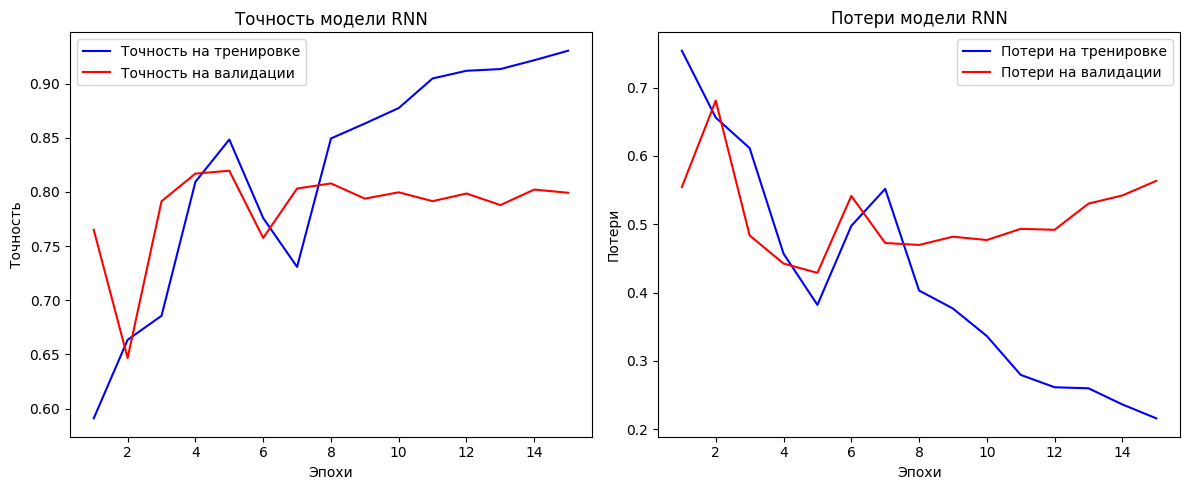

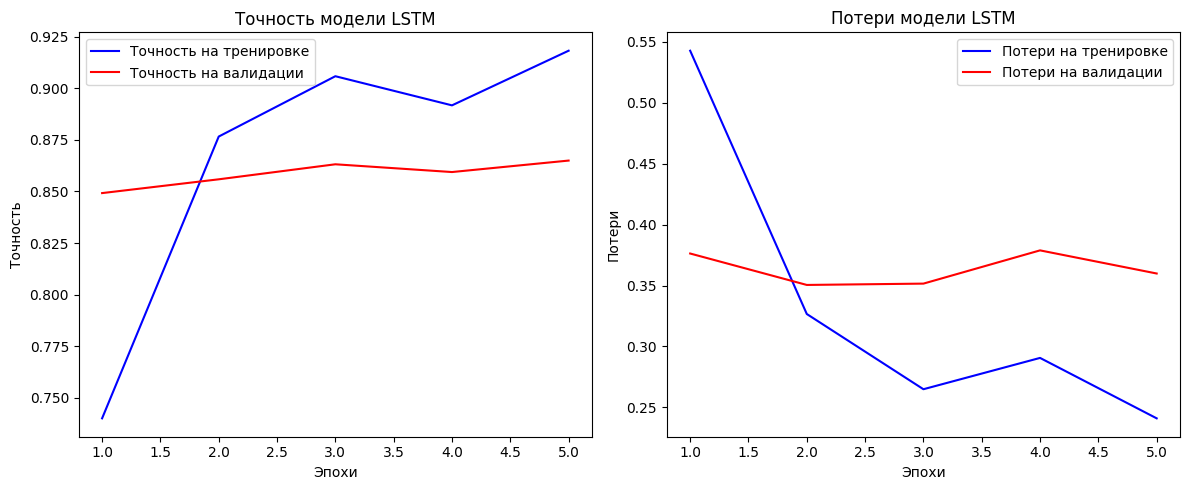

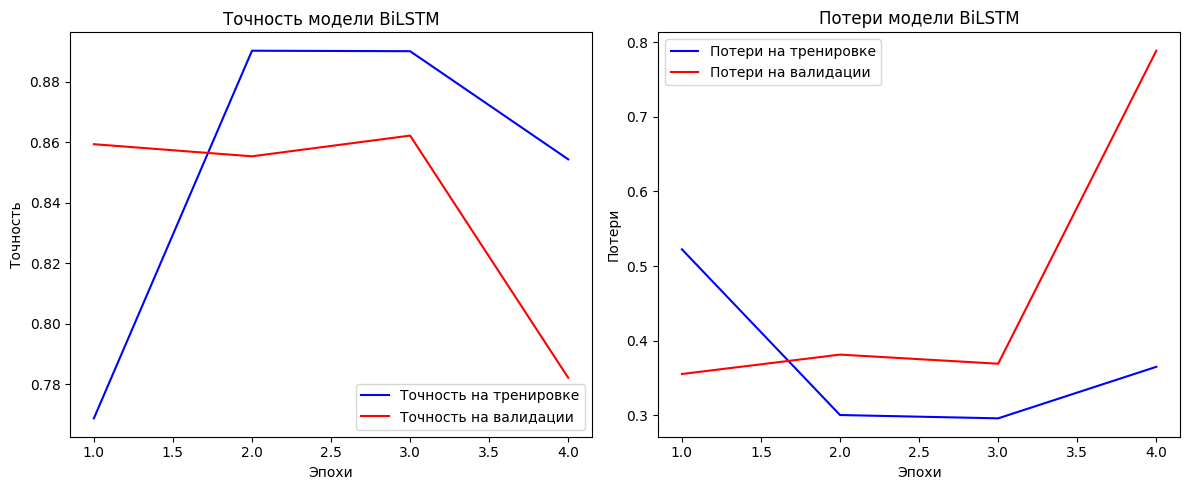

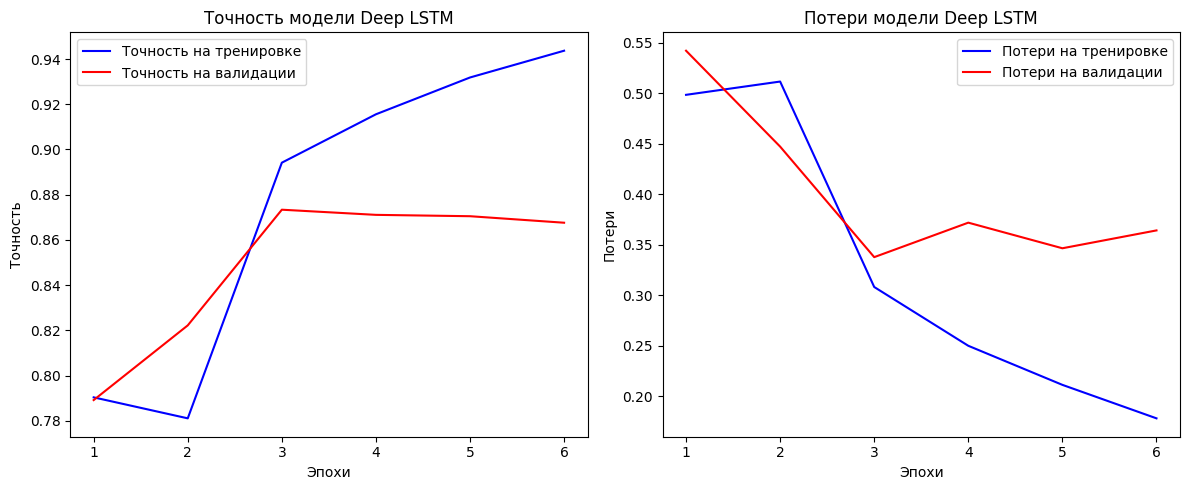

In [28]:
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Точность на тренировке')
    plt.plot(epochs, val_acc, 'r', label='Точность на валидации')
    plt.title(f'Точность модели {model_name}')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Потери на тренировке')
    plt.plot(epochs, val_loss, 'r', label='Потери на валидации')
    plt.title(f'Потери модели {model_name}')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history_rnn_reg, "RNN")
plot_history(history_lstm_reg, "LSTM")
plot_history(history_bilstm_reg, "BiLSTM")
plot_history(history_deep_lstm_reg, "Deep LSTM")

Стало намного лучше, особенно в случает с Simple RNN. В остальніх же кейсах, точность повысилась и я смог справится с переобучением.

После этого ДЗ я чувствую себя как этот парень на картинке 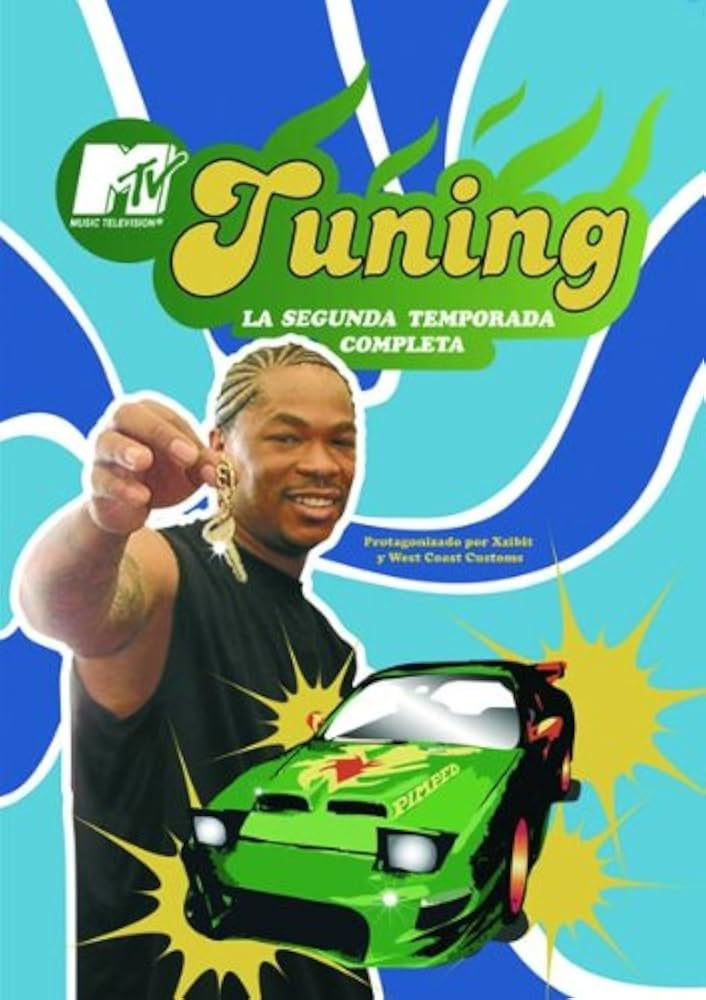